# Exploratory Data Analysis
We are going to perform an exploratory analysis on the scrapped `Irorun` data to gain some insight about the data.
- `reviewId`- Unique identification key per review
- `userName`- customer username
- `userImage`- url to customer display picture
- `reviews`- customer review 
- `score`- customer star rating
- `thumbsUpCount`- total number of like per reviews
- `reviewCreatedVersion`- customer app version as of the time of review
- `at`- date and time review was posted.
- `replyContent`- reply content per customer review
- `repliedAt`- date and time of reply per customer review

In [1]:
# Import neccessary libraries
import pandas as pd
import seaborn as sns
from scipy.stats import expon
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Irorun_scraped_reviews.csv", encoding="ISO-8859-1")
df.head()

,reviewId,userName,userImage,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,074b6496-832a-4d94-aaaf-088542998303,adeniyi muyiwa,https://play-lh.googleusercontent.com/a/AGNmyx...,Why is it so difficult in getting through to t...,1,0,14.4,2023-03-19 20:18:56,NaN,NaN
1,063b9d48-30be-4e08-9878-913b94721e50,Robel Mazengia,https://play-lh.googleusercontent.com/a/AGNmyx...,Efficient loan application and approval proces...,5,0,14.3,2023-03-19 03:57:56,NaN,NaN
2,d798fda8-303d-441d-8281-bfec50ab9cbd,SAFARì,https://play-lh.googleusercontent.com/a-/ACB-R...,"Needs an update, it crashes upon completing lo...",1,0,14.3,2023-03-19 01:18:21,NaN,NaN
3,846b3fb7-60df-4d13-873f-1398a7d6d38f,Ayodele Temitope,https://play-lh.googleusercontent.com/a-/ACB-R...,"The app is quick, nice design with monochromat...",4,0,14.3,2023-03-18 19:15:48,NaN,NaN
4,70355c77-26c8-457f-89da-3b9e778ecd73,Afolabi Oluwapelumi,https://play-lh.googleusercontent.com/a/AGNmyx...,Nice app. However you should also consider off...,4,0,NaN,2023-03-18 17:58:52,NaN,NaN


In [3]:
# drop unneccessary columns
df.drop(columns=["reviewId", "userImage"], axis=0)

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,adeniyi muyiwa,Why is it so difficult in getting through to t...,1,0,14.4,2023-03-19 20:18:56,NaN,NaN
1,Robel Mazengia,Efficient loan application and approval proces...,5,0,14.3,2023-03-19 03:57:56,NaN,NaN
2,SAFARì,"Needs an update, it crashes upon completing lo...",1,0,14.3,2023-03-19 01:18:21,NaN,NaN
3,Ayodele Temitope,"The app is quick, nice design with monochromat...",4,0,14.3,2023-03-18 19:15:48,NaN,NaN
4,Afolabi Oluwapelumi,Nice app. However you should also consider off...,4,0,NaN,2023-03-18 17:58:52,NaN,NaN
...,...,...,...,...,...,...,...,...
1604,Teemax Emm,Scam,1,1,NaN,2020-09-13 10:07:19,"Hi, can you please provide details so that we ...",2020-09-16 01:43:50
1605,Olugbara Blessing,"This ain't working at all, after adding selfie...",1,10,10.0,2020-08-25 00:07:26,"Hi, please email us a screenshot of the error ...",2020-09-16 01:42:57
1606,Amuda Babatunde Ajia,Your application is a scam you are not giving ...,1,7,10.0,2020-08-05 14:25:38,Hi Amuda. We're sorry that you couldn't get a ...,2020-09-16 01:42:23
1607,Tope Alabi,Useless app,1,1,NaN,2020-07-27 03:36:16,"Hi Tope, can you please provide details so tha...",2020-11-19 08:01:33


In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
df.shape

(1609, 10)

- There are 1609 unique customer reviews in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1609 non-null   object
 1   userName              1609 non-null   object
 2   userImage             1609 non-null   object
 3   reviews               1609 non-null   object
 4   score                 1609 non-null   int64 
 5   thumbsUpCount         1609 non-null   int64 
 6   reviewCreatedVersion  1237 non-null   object
 7   at                    1609 non-null   object
 8   replyContent          1492 non-null   object
 9   repliedAt             1492 non-null   object
dtypes: int64(2), object(8)
memory usage: 125.8+ KB


- we can observe that columns `at` and `repliedAt` which are both dates seems to be object dtype
- we will need to convert them to their appropriate datatype which is 'DateTime'

In [7]:
# Convert 'repliedAt' and 'at' columns to datatime dtype
df["repliedAt"] = pd.to_datetime(df["repliedAt"])
df["at"] = pd.to_datetime(df["at"])
print(df["at"].dtype)
print(df["repliedAt"].dtype)

datetime64[ns]
datetime64[ns]


In [8]:
# Check for null cells
df.isnull().sum()

reviewId                  0
userName                  0
userImage                 0
reviews                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    372
at                        0
replyContent            117
repliedAt               117
dtype: int64

- There are 117 customers reviews with no response from the developers
- There are 372 records of the irorun aoo version of the customer at that time.

In [9]:
# calculate the ratings distribution
ratings = df["score"].value_counts(normalize=True)
ratings

5    0.459291
1    0.346799
4    0.088875
3    0.055935
2    0.049099
Name: score, dtype: float64

- about 46% of the dataset was rated 5 star rating
- and about 35% of the dataset was rated 1 star rating

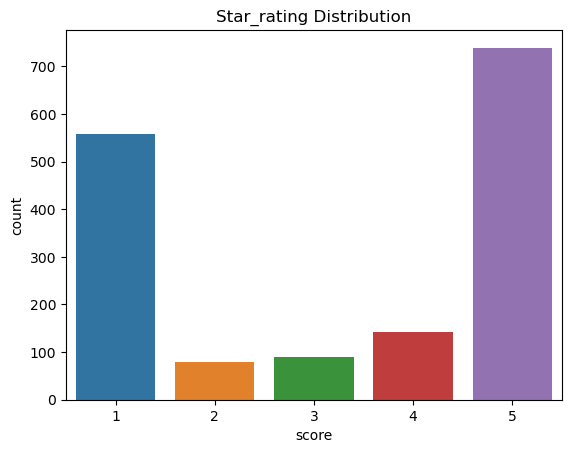

In [10]:
sns.countplot(x=df["score"])
plt.title("Star_rating Distribution")
plt.show()

* For the purpose of this analysis we will focus on the 1 star rating reviews to gain more insights

In [11]:
# count the reviews with the highest number of likes
df["thumbsUpCount"].value_counts()

0      1141
1       137
2       117
3        90
4        25
5        13
6         8
8         6
7         6
9         5
13        4
10        4
26        4
21        3
12        3
17        3
40        3
11        3
23        3
14        3
22        3
55        2
48        2
28        2
32        2
66        1
51        1
114       1
25        1
30        1
65        1
35        1
24        1
57        1
67        1
16        1
43        1
15        1
45        1
124       1
20        1
19        1
Name: thumbsUpCount, dtype: int64

In [12]:
# let's examine the most liked reviews `thumbsUpCount`

df_filtered = df[["userName", "reviews", "score", "thumbsUpCount", "reviewCreatedVersion", "replyContent" ]]
df_sorted = df_filtered.sort_values("thumbsUpCount", ascending = False)
df_sorted.head()

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,replyContent
579,Kalu Azu,Irorun provides fast access to loans with no c...,5,124,NaN,We are pleased that you enjoyed the app. If th...
1373,sunday ekong,"I do really loved their loan processing, it wa...",4,114,10.5,"Hello Sunday,\n\nThank you for the feedback. Y..."
867,Charles DolmicA,"For me,my experience is so terrible thatal at ...",1,67,11.4,"Hello Charles, we regret to note this. Please ..."
1036,Ahmed Ramon,I'm satisfied with this IRORUN LOAN... their s...,5,66,11.2,Thank you for your encouraging words.??????????
1466,Timi Okedele,The app keeps crashing during registration whi...,1,65,10.4,We apologise for the difficulties you experien...


- at a quick glance we can will notice that there are both recent high and low star rating `score`
- we will closely examine the top 3 most liked comment to gain more insights

In [13]:
# lets obeserve the most liked review
most_liked = df_sorted.iloc[0]["reviews"]
most_liked

"Irorun provides fast access to loans with no collaterals but with peace of mind, this app makes it easy for you to access loans just when you need it. Sign up in a few seconds, apply for a loan, and receive your money into your wallet. You can transfer to your bank accounts immediately. It's a fast, convenient, and reliable way to fix your spending gap. great app i recommend it to all."

In [14]:
# the second most liked review
second_ml = df_sorted.iloc[1]["reviews"]
second_ml

"I do really loved their loan processing, it was quite faster and simple no too much of questioning nor filling of unnecessary info. But again their loan period are good and their interest rate are quitely perfect for any one to go for ...but though I'm yet to receive my first loan ever from them... I think they are good to go for friends!"

In [15]:
# the third most liked review
third_ml = df_sorted.iloc[2]["reviews"]
third_ml

'For me,my experience is so terrible thatal at the point I needed money,the loan took so long before running,now the money was kept in the wallet,I transferred it expecting it to appear in my acct,since yesterday,till forever sef if not seen it,I went to bank to check no disburstment. On the 10 the of december.am sure u know No repayment for such loan'

In [16]:
# determine the date of the first review
first_review = df["at"].min()
print(f"The first customer' review was at {first_review}")

The first customer' review was at 2020-07-08 15:58:01


In [17]:
# the last review in this dataset
recent_review = df["at"].max()
print(f"The most recent review within the dataset was at {recent_review}")

The most recent review within the dataset was at 2023-03-19 20:18:56


* the most recent review is most likely the first review to be viewed by a potental customer browsing, hence we will take close look at it

In [18]:
# Sort the dataset showing from recent to older reviews
sorted_df = df.sort_values("at", ascending=False)
sorted_df.head()

,reviewId,userName,userImage,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,074b6496-832a-4d94-aaaf-088542998303,adeniyi muyiwa,https://play-lh.googleusercontent.com/a/AGNmyx...,Why is it so difficult in getting through to t...,1,0,14.4,2023-03-19 20:18:56,NaN,NaT
1,063b9d48-30be-4e08-9878-913b94721e50,Robel Mazengia,https://play-lh.googleusercontent.com/a/AGNmyx...,Efficient loan application and approval proces...,5,0,14.3,2023-03-19 03:57:56,NaN,NaT
2,d798fda8-303d-441d-8281-bfec50ab9cbd,SAFARì,https://play-lh.googleusercontent.com/a-/ACB-R...,"Needs an update, it crashes upon completing lo...",1,0,14.3,2023-03-19 01:18:21,NaN,NaT
3,846b3fb7-60df-4d13-873f-1398a7d6d38f,Ayodele Temitope,https://play-lh.googleusercontent.com/a-/ACB-R...,"The app is quick, nice design with monochromat...",4,0,14.3,2023-03-18 19:15:48,NaN,NaT
4,70355c77-26c8-457f-89da-3b9e778ecd73,Afolabi Oluwapelumi,https://play-lh.googleusercontent.com/a/AGNmyx...,Nice app. However you should also consider off...,4,0,NaN,2023-03-18 17:58:52,NaN,NaT


In [19]:
# close examination of the latest review
recent_review = sorted_df.iloc[0]["reviews"]
recent_review

'Why is it so difficult in getting through to the dashboard after inputing password and necessary details.'

### Feature Engineering
- We are going to create a new feature called `duration`
- `duration` is the time taken (in days) for support to reply a customer's review
---------
- we will also create a new feature `year`
-`year`- consist of the year each review was created

In [20]:
# Calculate the number of days it took before each review got a reply
df["duration"] = (df["repliedAt"] - df["at"]).dt.days

In [21]:
df["duration"].max()

196.0

In [22]:
df["duration"].min()

-589.0

- it is impossible to have a negative reponse time

In [23]:
negative_duration = len(df[df["duration"]<0])
print(f"There are {negative_duration} negative duration")

There are 82 negative duration


In [24]:
# Drop all negative duration values
new_df = df.drop(df[df["duration"]<0].index)

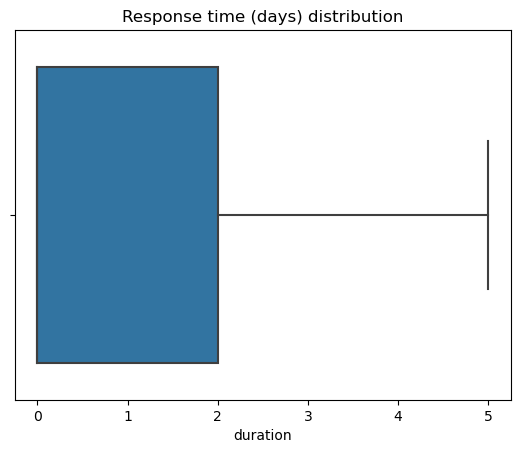

In [25]:
sns.boxplot(x="duration", data=new_df, sym="")
plt.title("Response time (days) distribution")
plt.show()

In [26]:
new_df["duration"].mean()

3.0645390070921987

In [27]:
# what is the probability of getting an early reply (<=2 days)
expon.cdf(2, scale=3)

0.486582880967408

- there is about a 50% chance of getting an early reply 

In [28]:
# Create a new feature of the the year each review was created
df["year"] = df["at"].dt.year

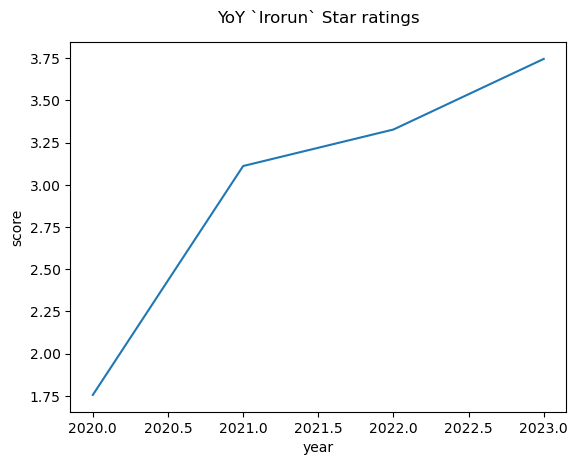

<Figure size 2000x1000 with 0 Axes>

In [29]:
# Create a line chart of score over time

g=sns.lineplot(x="year", y="score", data=df, ci=None)
plt.figure(figsize=(20, 10))
g.set_title("YoY `Irorun` Star ratings", y=1.03)
plt.show()

- there was a rapid increase in `Irorun` app rating from 2020 to early 2021
- it lost the momentum in 2021 and it has been gradually raising till 2023

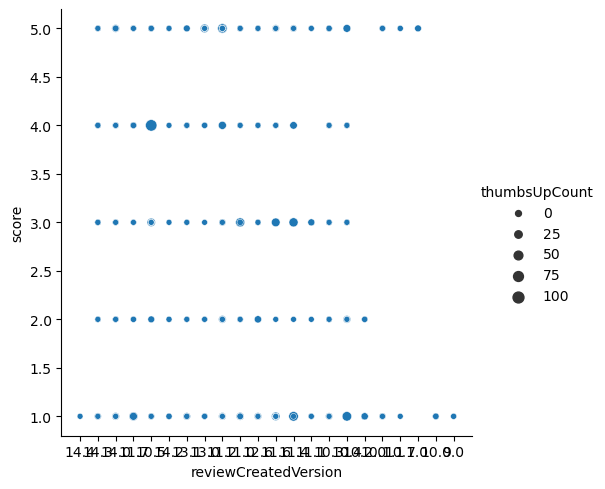

In [30]:
# Checking for correlation between star rating and app version
sns.relplot(x="reviewCreatedVersion", y="score", data=df, kind="scatter", size="thumbsUpCount")

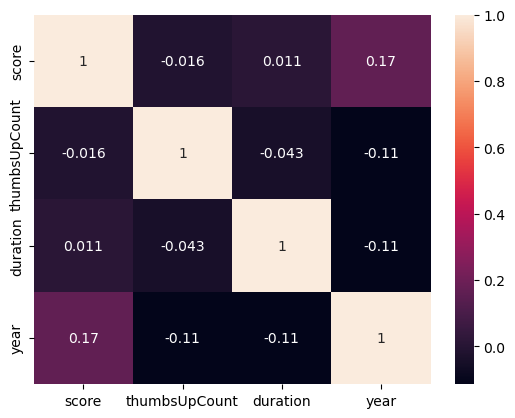

In [31]:
# Plot a heatmap showing relationships
sns.heatmap(df.corr(), annot=True)
plt.show()

Assumptions
----
Here are some assumptions used moving forward;
* all `duration` greater than 2 days are consided as `late_reply`
* all `duration` less than equal to 2 days are consided as `early_reply`
* all Null cells in  `repliedAt` are labeled `no_reply`

In [32]:
# Replies that took more than two days `late_reply`
df_filter = df[["userName", "reviews", "score", "replyContent", "at", "repliedAt","duration" ]]
late_reply = df_filter[df_filter["duration"]>2]
late_reply = late_reply.sort_values("duration", ascending=False)
late_reply.head()

,userName,reviews,score,replyContent,at,repliedAt,duration
1465,Anita Ifunanya,I don't understand they keep asking me for my ...,1,"Hi Anita, the referral code (which isn't compu...",2021-03-23 17:26:39,2021-10-06 14:56:22,196.0
1608,HAMMED ISMAIL,D must useless app dnt waste ur data,1,"Hello Hammad, We can confirm that you were abl...",2020-07-08 15:58:01,2020-11-19 08:12:12,133.0
595,Philomina Obianuju,Woow this is an amazing app. At first I though...,5,Thankd for the good feedback. You're far too k...,2022-08-20 01:00:59,2022-12-26 00:30:58,127.0
594,afiz billiaminu,"To me, it's not a good loan platform... Loan d...",1,"Hello Afiz, We're sorry we couldn't provide yo...",2022-08-20 01:03:10,2022-12-25 23:32:39,127.0
592,Ahmed Babalola,ReLiable,5,Thankd for the good feedback. You're far too k...,2022-08-20 19:45:37,2022-12-26 00:30:50,127.0


In [33]:
# number of late replies
late_replies = len(late_reply)
print(f"The numner of late replies were:", late_replies)

The numner of late replies were: 267


In [34]:
# number of reviews with no reply
no_reply = df["repliedAt"].isnull().sum()
print(f"The number of reviews that had no reply were:", no_reply)

The number of reviews that had no reply were: 117


In [35]:
# number of reviews with early reply
earl_reply = len(new_df[new_df["duration"]<=2])
earl_reply

1143

In [42]:
# Create a diction of replies
replies = {
    "reply_type": ["early_reply", "late_reply", "no_reply" ],
    "count": [1143, 41, 117]
}

In [43]:
reply_df = pd.DataFrame(replies)
reply_df

,reply_type,count
0,early_reply,1143
1,late_reply,41
2,no_reply,117


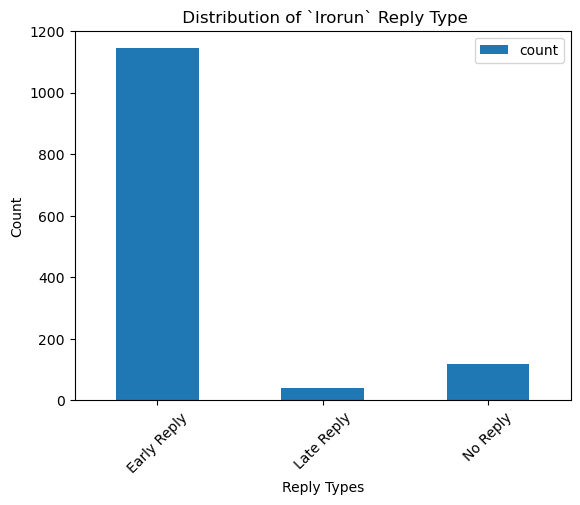

In [44]:
reply_df.plot(kind="bar")

# set custom x-axis tick labels
xtick_labels =[ "Early Reply", "Late Reply", "No Reply" ]
plt.gca().set_xticklabels(xtick_labels, rotation=45)

plt.title(" Distribution of `Irorun` Reply Type")
plt.xlabel("Reply Types")
plt.ylabel("Count")
plt.show()